In [1]:
from cortix.src.port import Port
from cortix.src.module import Module
from cortix.src.cortix_main import Cortix
from cortix.util.dataplot import DataPlot

# Import the example fluid flow models
from cortix.examples.fluidflow.vortex import Vortex
from cortix.examples.fluidflow.droplet import Droplet

In [2]:
# Init the Cortix object
c = Cortix(use_mpi=False)

# Initialize and add the Vortex module to Cortix
v = Vortex()
c.add_module(v)

2019-06-18 16:40:03,814 - cortix - INFO - Created Cortix object


In [9]:
# Construct 5 droplets
num_drops = 5

for i in range(num_drops):
    droplet = Droplet()
    
    data_plot = DataPlot()
    data_plot.title = "Droplet Position Over Time"

    # Initialize the ports
    drop_port = Port("position")
    plot_port = Port("position-{}".format(i))
    droplet_req_port = Port("droplet-request-{}".format(i))
    velocity_port = Port("velocity-{}".format(i))
    vortex_req_port = Port("velocity-request")
    vortex_velocity_port = Port("velocity")

    # Connect the ports
    drop_port.connect(plot_port)
    droplet_req_port.connect(vortex_req_port)
    velocity_port.connect(vortex_velocity_port)

    # Add the ports to module
    data_plot.add_port(plot_port)
    droplet.add_port(drop_port)
    droplet.add_port(vortex_req_port)
    droplet.add_port(vortex_velocity_port)
    v.add_port(droplet_req_port)
    v.add_port(velocity_port)

    # Add the modules to Cortix
    c.add_module(droplet)
    c.add_module(data_plot)

In [10]:
# Run the simulation!
c.run()

2019-06-18 16:42:34,273 - cortix - INFO - Launching Module <cortix.examples.fluidflow.vortex.Vortex object at 0x7fc4e0bfd860>
2019-06-18 16:42:34,287 - cortix - INFO - Launching Module <cortix.examples.fluidflow.droplet.Droplet object at 0x7fc4d0b645c0>
2019-06-18 16:42:34,297 - cortix - INFO - Launching Module <cortix.util.dataplot.DataPlot object at 0x7fc510420cc0>
2019-06-18 16:42:34,304 - cortix - INFO - Launching Module <cortix.examples.fluidflow.droplet.Droplet object at 0x7fc4de8f19b0>
2019-06-18 16:42:34,311 - cortix - INFO - Launching Module <cortix.util.dataplot.DataPlot object at 0x7fc4de8f1ac8>
2019-06-18 16:42:34,320 - cortix - INFO - Launching Module <cortix.examples.fluidflow.droplet.Droplet object at 0x7fc4de905c88>
2019-06-18 16:42:34,330 - cortix - INFO - Launching Module <cortix.util.dataplot.DataPlot object at 0x7fc4de905da0>
2019-06-18 16:42:34,338 - cortix - INFO - Launching Module <cortix.examples.fluidflow.droplet.Droplet object at 0x7fc4de909f98>
2019-06-18 16:

  File "/usr/lib64/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib64/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib64/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib64/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib64/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib64/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib64/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib64/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/taha/Research/Cortix/cortix/cortix/examples/fluid

  File "/home/taha/Research/Cortix/cortix/cortix/src/port.py", line 49, in recv
    return self.connected.q.get()
  File "/usr/lib64/python3.6/threading.py", line 1072, in _wait_for_tstate_lock
    elif lock.acquire(block, timeout):
KeyboardInterrupt
KeyboardInterrupt
  File "/home/taha/Research/Cortix/cortix/cortix/src/port.py", line 49, in recv
    return self.connected.q.get()
  File "/usr/lib64/python3.6/multiprocessing/connection.py", line 216, in recv_bytes
    buf = self._recv_bytes(maxlength)
  File "/usr/lib64/python3.6/threading.py", line 1072, in _wait_for_tstate_lock
    elif lock.acquire(block, timeout):
  File "/usr/lib64/python3.6/multiprocessing/connection.py", line 216, in recv_bytes
    buf = self._recv_bytes(maxlength)
KeyboardInterrupt
  File "/usr/lib64/python3.6/multiprocessing/queues.py", line 94, in get
    res = self._recv_bytes()
KeyboardInterrupt
  File "/usr/lib64/python3.6/multiprocessing/connection.py", line 216, in recv_bytes
    buf = self._recv_bytes(ma

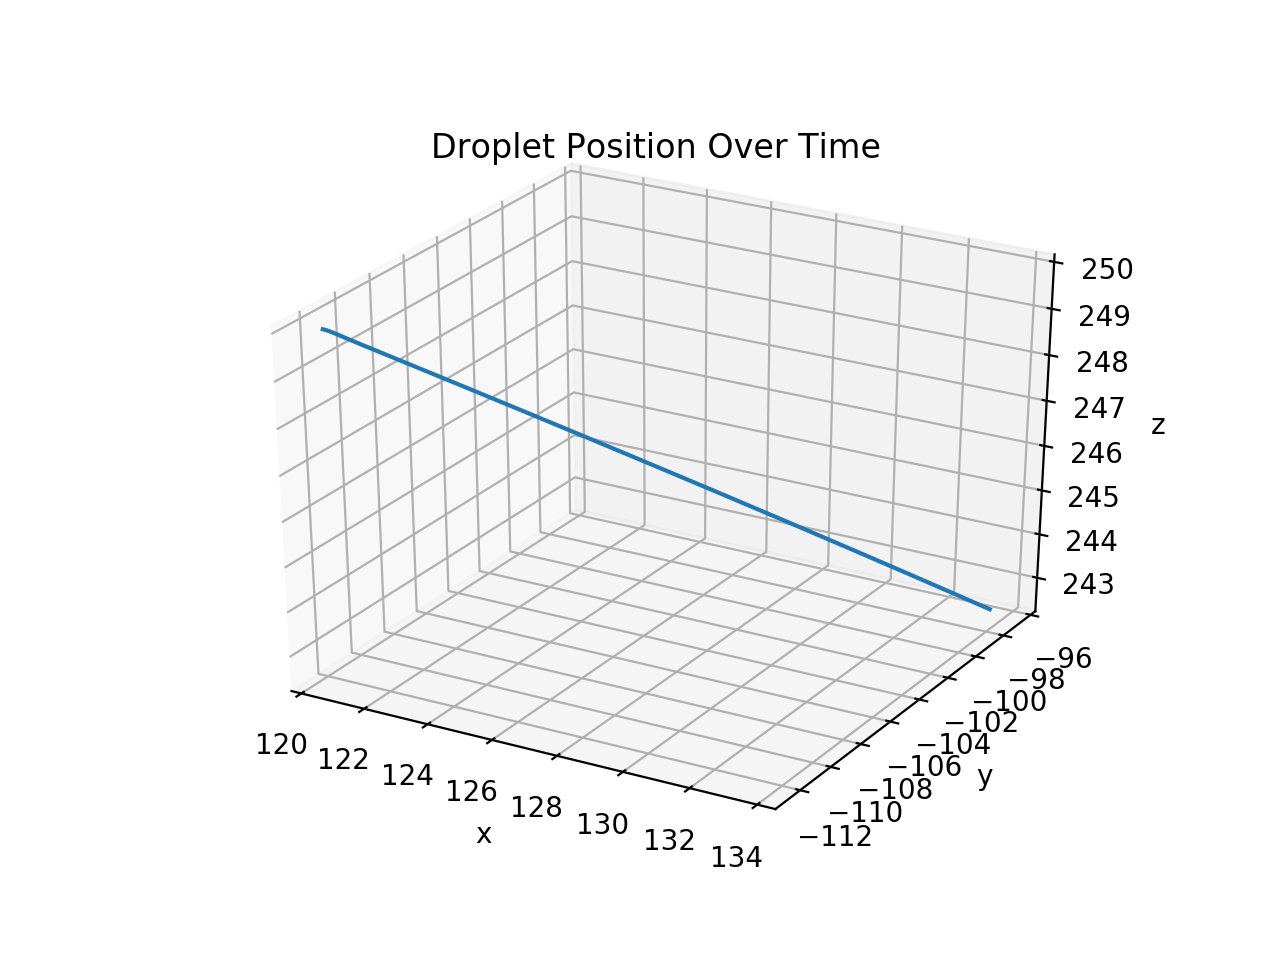

In [13]:
# View a random droplet
from random import randint
from IPython.display import Image, display
rand_img = "position-{}.png".format(randint(0, num_drops))
display(Image(filename=rand_img))